# Convolutional Neural Networks

### References

* http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf
* https://pdfs.semanticscholar.org/450c/a19932fcef1ca6d0442cbf52fec38fb9d1e5.pdf
* https://arxiv.org/pdf/1609.04112.pdf
* https://arxiv.org/pdf/1502.01852.pdf
* http://ais.uni-bonn.de/papers/icann2010_maxpool.pdf
* https://adeshpande3.github.io/adeshpande3.github.io/The-9-Deep-Learning-Papers-You-Need-To-Know-About.html
* https://rdipietro.github.io/friendly-intro-to-cross-entropy-loss/
* https://peterroelants.github.io/posts/cross-entropy-softmax/

ToDo:

* What do the different objects and parametrizations in Keras do?
  * https://keras.io/layers/convolutional/
  * https://keras.io/layers/pooling/
  * https://keras.io/preprocessing/image/

# Theoretical Foundations

## The Convolution Operation

References:

* Jianxin Wun paper https://pdfs.semanticscholar.org/450c/a19932fcef1ca6d0442cbf52fec38fb9d1e5.pdf
* Jay Kuo paper https://arxiv.org/pdf/1609.04112.pdf
* Kaiming He paper https://arxiv.org/pdf/1502.01852.pdf

$$ (f \ast g) = \int_{-\infty}^{\infty}f(\tau)g(t-\tau)d\tau $$

<img src='resources/cnn-components.png'>

In 3D it works similarly. The kernel is a tensor the same order of the image, so in the initial location (0, 0, 0), it captures the elements in all the channels. Then, the kernel is moved from top to bottom and left to right to complete the convolution.

As multiple kernels are used in each layer, these kernels (or weights) are represented with an order 4 tensor.

As long as the convolution kernel is larger than $1\times 1$, the output of the convolution layer will be smaller than the input. The convolution output size of an input of dimensions $H_i\times W_i\times C$ with a kernel of dimensions $H_k\times W_k\times C\times K$ is given by:

$$ (H_i-H_k+1)\times(W_i-W_k+1)\times C $$

To force outputs to have the same dimensions as the input, for every channel of the input there must be some padding applied. The required padding is:

* $\lfloor\frac{H_k-1}{2}\rfloor$ rows above the first row.
* $\lfloor\frac{H_k}{2}\rfloor$ rows below the last row.
* $\lfloor\frac{W_k-1}{2}\rfloor$ columns to the left of the first column.
* $\lfloor\frac{W_k}{2}\rfloor$ columns to the right of the last column.

Kernels act as feature detectors, for example by amplifying vertical or horizontal edges, as shown below:

<img src='resources/kernels.png'>

Kernels in deeper layers act as feature detectors for groups of shapes, potentially forming more specific object detectors.

## Convolution as a Matrix Product




## Activation functions

* Convolutional Neural Networks, due to their characteristic depth, require non-vanishing activation functions such as ReLU. Sigmoid activations work significantly worse due to gradient vanishing.

## Pooling

ToDo:

* Dominik Scherer paper http://ais.uni-bonn.de/papers/icann2010_maxpool.pdf

Induces *spatial invariance* on the feature map and reduces dimensionality, by keeping the detected features and dropping the image size.

## Softmax Activation and Cross-Entropy Loss

ToDo:

* Rob DiPietro paper https://rdipietro.github.io/friendly-intro-to-cross-entropy-loss/
* Peter Roelants paper https://peterroelants.github.io/posts/cross-entropy-softmax/

The **softmax function**, or **normalized exponential function**, is a generalization of the logistic function that *"squashes"* a $K$-dimensional vector $z$ of arbitrary real values to a $K$-dimensional vector $\sigma(z)$ of real values, for $K\geq2$ where each entry is in the interval $(0,1)$ and all the entries add up to $1$.

$$ \sigma_j(z) = \frac{e^{z_j}}{\sum_ke^{z_k}} $$

Cross entropy:

$$ H(p,q) = -\sum_xp(x)\log q(x) $$

## The Convolutional Neural Network Process

ToDo:

* Adit Deshpande paper https://adeshpande3.github.io/adeshpande3.github.io/The-9-Deep-Learning-Papers-You-Need-To-Know-About.html

---

1. Transform the input image into a matrix of pixel intensities.
2. Apply a set of filters or feature detectors with their respective activations (usually ReLU or Leaky ReLU).
3. Apply a pooling operation to induce spatial invariance and reduce dimensionality.
4. Repeat steps 2 and 3 to keep obtaining features.
5. Flatten the pooled feature maps.
6. Input the flattened feature map into a fully connected neural network to be used on regression or classification tasks.
7. Backpropagate errors.

# Image Augmentation

The data (images) directory is structured in the following way:

* data
  * train
    * cats
    * dogs
  * test
    * cats
    * dogs

Image augmentation is a process in which sources images are transformed in order to prevent overfitting. These transformations are processed in batches, where each batch applies a specific transformation to the set of images (rotation, shifting, flipping, shearing), giving more diversity in the training set.

In [5]:
#Image preprocessing and augmentation
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, #rescales pixel values from 0-255 to 0-1
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set_generator = train_datagen.flow_from_directory('data/training_set',
                                                           target_size=(64, 64),
                                                           batch_size=32,
                                                           class_mode='binary')

test_set_generator = test_datagen.flow_from_directory('data/test_set',
                                                      target_size=(64, 64),
                                                      batch_size=32,
                                                      class_mode='binary')

Found 7882 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Convolutional Neural Networks in Keras

In [12]:
#Just give me the code
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(64, 64, 3)))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=1, activation='sigmoid'))

cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

cnn.fit_generator(training_set_generator, epochs=25, validation_data=test_set_generator)

Epoch 1/25
247/247 [==============================] - 78s 316ms/step - loss: 0.6561 - binary_accuracy: 0.6288 - val_loss: 0.5818 - val_binary_accuracy: 0.7045
Epoch 2/25
247/247 [==============================] - 100s 405ms/step - loss: 0.5778 - binary_accuracy: 0.6927 - val_loss: 0.5772 - val_binary_accuracy: 0.6985
Epoch 3/25
247/247 [==============================] - 107s 433ms/step - loss: 0.5571 - binary_accuracy: 0.7061 - val_loss: 0.5907 - val_binary_accuracy: 0.6895
Epoch 4/25
247/247 [==============================] - 103s 416ms/step - loss: 0.5208 - binary_accuracy: 0.7435 - val_loss: 0.5532 - val_binary_accuracy: 0.7215
Epoch 5/25
247/247 [==============================] - 99s 402ms/step - loss: 0.5035 - binary_accuracy: 0.7546 - val_loss: 0.5739 - val_binary_accuracy: 0.7215
Epoch 6/25
247/247 [==============================] - 97s 394ms/step - loss: 0.4902 - binary_accuracy: 0.7524 - val_loss: 0.5389 - val_binary_accuracy: 0.7555
Epoch 7/25
247/247 [=======================

In [14]:
from joblib import dump

dump(cnn, 'models/cnn.joblib')

['models/cnn.joblib']

In [ ]:
#Let's try the model on my cat's picture
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

#import cat image
test_image = image.load_img('data/new_image.jpg', target_size=(64, 64)) #image 64x64
test_image = image.img_to_array(test_image) #tensor 64x64x3
test_image = np.expand_dims(test_image, axis=0) #tensor 1x64x64x3, Keras CNN requires a batch of images instead of a single one

#plot image

#classify
result = cnn.predict(test_image)

training_set_generator.class_indices

if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

ToDo:

* Use the ANN Framework to compare models with different hyperparameters
* Create a Framework that allows you to see the filters learned by the CNN, understanding filters learned in deep networks.
* Create a Framework that allows you to understand how feature maps change under certain transformations:
  * Kernel size
  * Stride
  * Activation
  * Pool size
  * Pool size striding
* Explore the image augmentation features. What happens to images under each transformation?

# Exploring Convolutional Neural Networks more Deeply...

# What do Kernels actually do on the images?

* Apply several known filters to an image of your own and see what happens.

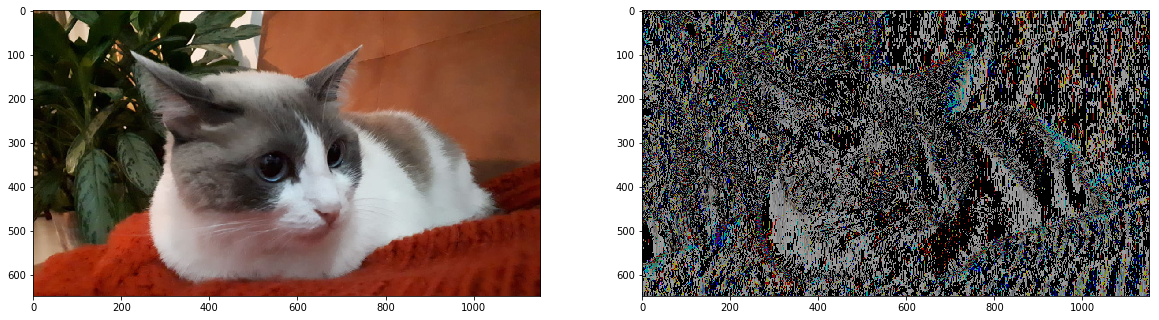

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.ndimage import convolve

#load and show picture of my cat
img = mpimg.imread('data/new_image.jpg')
f = plt.figure(figsize=(20,6))
ax1 = f.add_subplot(1,2,1)
ax1.imshow(img)

#define the kernel
kernel = [[[1, 2, 1],
           [0, 0, 0],
           [-1, -2, -1]],
          [[1, 2, 1],
           [0, 0, 0],
           [-1, -2, -1]],
          [[1, 2, 1],
           [0, 0, 0],
           [-1, -2, -1]]]

#apply the convolution
convoluted = np.array(convolve(img, kernel), dtype=int)
conv_shape = convoluted.shape

#add a bias
bias = -90
convoluted = convoluted + bias

#activate with ReLU
convoluted = np.array([max(0,x) for x in convoluted.flatten()]).reshape(conv_shape)

ax2 = f.add_subplot(1,2,2)
ax2.imshow(convoluted)

plt.show()